
## Analysis and Visualizations of Data


In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.style.use('ggplot')

In [4]:
df = pd.read_csv('twitter_archive_master_new.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2073 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2073 non-null   object 
 4   source                 2073 non-null   object 
 5   text                   2073 non-null   object 
 6   expanded_urls          2073 non-null   object 
 7   numerator              2073 non-null   int64  
 8   denominator            2073 non-null   int64  
 9   name                   2073 non-null   object 
 10  dog_stage              2073 non-null   object 
 11  jpg_url                2073 non-null   object 
 12  img_num                2073 non-null   int64  
 13  p1                     2073 non-null   object 
 14  p1_conf                2073 non-null   float64
 15  p1_d

In [5]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,numerator,denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,1.2


In [6]:


# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['dog_stage'] = df['dog_stage'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2073 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               2073 non-null   object  
 1   in_reply_to_status_id  23 non-null     float64 
 2   in_reply_to_user_id    23 non-null     float64 
 3   source                 2073 non-null   object  
 4   text                   2073 non-null   object  
 5   expanded_urls          2073 non-null   object  
 6   numerator              2073 non-null   int64   
 7   denominator            2073 non-null   int64   
 8   name                   2073 non-null   object  
 9   dog_stage              2073 non-null   category
 10  jpg_url                2073 non-null   object  
 11  img_num                2073 non-null   int64   
 12  p1                     2073 non-null   object  
 13  p1_conf                2073 non-null   float6

In [7]:
df.describe()

,in_reply_to_status_id,in_reply_to_user_id,numerator,denominator,img_num,p1_conf,p2_conf,p3_conf,likes,retweets,rating
count,2.300000e+01,2.300000e+01,2073.000000,2073.0,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000,2073.000000
mean,6.978112e+17,4.196984e+09,12.265798,10.0,1.203570,0.594532,1.346665e-01,6.034005e-02,8556.718283,2976.089243,1.226580
std,4.359384e+16,0.000000e+00,40.699924,0.0,0.561856,0.271234,1.006830e-01,5.092769e-02,12098.640994,5054.897526,4.069992
min,6.671522e+17,4.196984e+09,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000,0.000000
25%,6.732411e+17,4.196984e+09,10.000000,10.0,1.000000,0.364095,5.390140e-02,1.619920e-02,1674.000000,634.000000,1.000000
50%,6.757073e+17,4.196984e+09,11.000000,10.0,1.000000,0.588230,1.186220e-01,4.947150e-02,3864.000000,1408.000000,1.100000
75%,7.031489e+17,4.196984e+09,12.000000,10.0,1.000000,0.843911,1.955730e-01,9.193000e-02,10937.000000,3443.000000,1.200000
max,8.558181e+17,4.196984e+09,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000,177.600000


Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

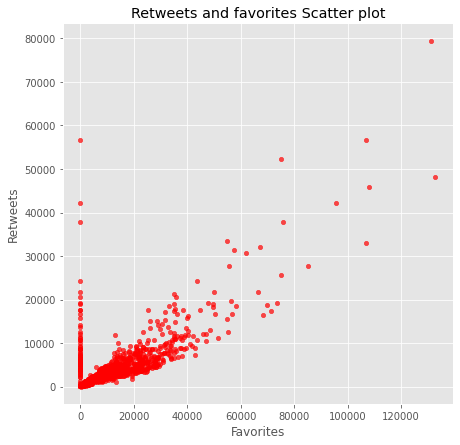

In [8]:
df.plot(kind='scatter',x='likes',y='retweets', alpha = 0.7, figsize=(7,7), color='red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')



As, likes increase,so does the retweets..

Text(0, 0.5, 'Rating')

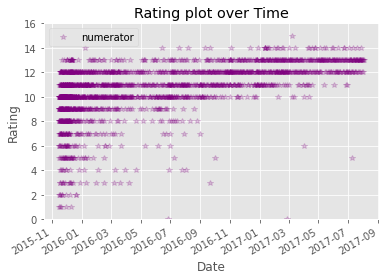

In [9]:
df.plot(y ='numerator', ylim=[0,16], style = '*', alpha = .2, color = 'purple')
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

Numerator rating 12 is most common if we go datewise plot.

In [10]:

from textblob import TextBlob


In [11]:
df['text'][10]


'This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme'

In [12]:
TextBlob(df['text'][10]).sentiment


Sentiment(polarity=-0.25, subjectivity=0.5)

In [13]:
text1 = " ".join(review for review in df.text)

In [14]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

from textblob import TextBlob

bloblist_tags = list()

df_tags_str=df['text']
for row in df_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_polarity_tags):
    if df_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_polarity_tags['Sentiment_Type'] = df_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_tags)

NameError: name 'reload' is not defined

We can infer, most of the texts are positive and 2ndly neutral and less than 50% in comparision to positive words are negative in polarity.

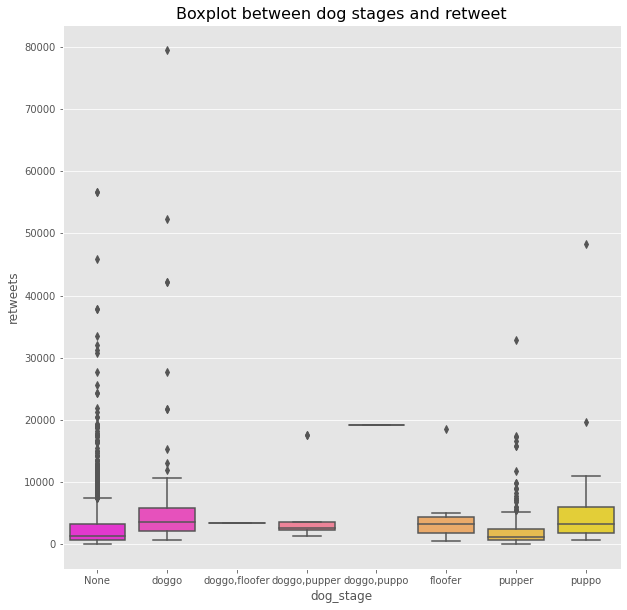

In [15]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x='dog_stage',y='retweets',data= df,palette='spring')
g.axes.set_title('Boxplot between dog stages and retweet', fontsize=16);

In [133]:
#This shows that most dogs are in Puppo category but highest retweets are about doggo category